# Machine Learning Classification

### Description

This Jupyter notebook demonstrates the use of various machine learning classification algorithms using Scikit-Learn Package

### 1. Installing and Importing the Required Packages

In [1]:
#!pip install numpy
#!pip install pandas
#!pip install matplotlib
#!pip install scikit-learn

import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
from sklearn import preprocessing
%matplotlib inline

### 2. Download the Dataset

In [4]:
# This is a loan collection data set taken from an IBM course in Python
!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv

--2021-12-17 16:04:00--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: 'loan_train.csv'

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0s      

2021-12-17 16:04:01 (61.0 MB/s) - 'loan_train.csv' saved [23101/23101]



### 3. Loading and Pre-processing the Dataset

#### 3.1 Converting the Catagorical Values to Numerical Values

In [2]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


First, we convert the date to the required datetime format

In [3]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


Next, we convert the gender into numerical values (male = 0, female = 1)

In [4]:
df['Gender'].replace(to_replace=['male', 'female'], value=[0,1], inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0


Finally, we split education into 4 categories (bachelor, High School or Below, college, Master or Above) then assign binary variables

In [5]:
df = pd.concat([df, pd.get_dummies(df['education'])], axis=1)
df[0:5]

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,Bechalor,High School or Below,Master or Above,college
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,0,1,0,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,1,0,0,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,0,0,0,1
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,0,0,0,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,0,0,0,1


#### 3.2 Feature Selection

First, we select the features that might be relevant to the target prediction.

In [6]:
X = df[['Principal', 'terms', 'age', 'Gender', 'Bechalor', 'High School or Below', 'college']]
X[0:5]

,Principal,terms,age,Gender,Bechalor,High School or Below,college
0,1000,30,45,0,0,1,0
1,1000,30,33,1,1,0,0
2,1000,15,27,0,0,0,1
3,1000,30,28,1,0,0,1
4,1000,30,29,0,0,0,1


Next, we normalize the Feature set.

In [7]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -0.38170062,
         1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177,  2.61985426,
        -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -0.38170062,
        -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177, -0.38170062,
        -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004, -0.38170062,
        -0.87997669,  1.14984679]])

#### 3.3 Target Variable

Next we work on the target variable

In [8]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

We convert the target to numerical values.

In [9]:
df['loan_status'].replace(to_replace=['PAIDOFF', 'COLLECTION'], value=[0,1], inplace=True)
y = df['loan_status'].values
y[0:5]

array([0, 0, 0, 0, 0])

### 4. Perform Machine Learning Using Different Classification Models

#### 4.1 K Nearest Neighbor (KNN)

First, we split the data into training set and test set.

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

We then calculate the accuracy of KNN models for different values of k.

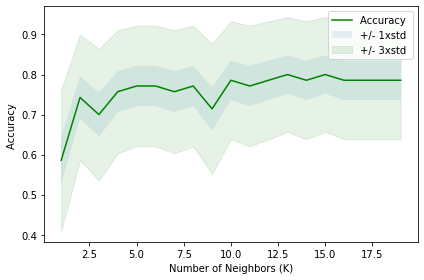

The best accuracy was with 0.8 with k= 13


In [63]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1, Ks):
    neigh = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    yhat = neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

Finally, using k = 13 we train using the entire dataset.

In [65]:
k = 13
neigh = KNeighborsClassifier(n_neighbors = k)
neigh.fit(X, y)

KNeighborsClassifier(n_neighbors=13)

#### 4.2 Decision Tree

In [15]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy', max_depth=4)
tree.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

#### 4.3 Support Vector Machine

In [16]:
from sklearn import svm
supvec = svm.SVC(kernel='rbf', probability=True)
supvec.fit(X, y)

SVC(probability=True)

#### 4.4 Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver='liblinear')
LR.fit(X,y)

LogisticRegression(C=0.01, solver='liblinear')

### 5. Model Evaluation

#### 5.1 Loading and Pre-processing the Test Set

To compare the four models, we download a separate test data set.

In [41]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2021-12-17 16:44:22--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: 'loan_test.csv'

loan_test.csv       100%[===================>]   3.56K  --.-KB/s    in 0s      

2021-12-17 16:44:23 (99.2 MB/s) - 'loan_test.csv' saved [3642/3642]



Similar to the training dataset, we need to do pre-processing.

In [25]:
test_df = pd.read_csv('loan_test.csv')
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['Gender'].replace(to_replace=['male', 'female'], value=[0,1], inplace=True)
test_df = pd.concat([test_df, pd.get_dummies(test_df['education'])], axis=1)
test_X = test_df[['Principal', 'terms', 'age', 'Gender', 'Bechalor', 'High School or Below', 'college']]
test_X = preprocessing.StandardScaler().fit(test_X).transform(test_X)
test_X[0:5]

array([[ 0.49362588,  0.92844966,  3.05981865,  1.97714211,  2.39791576,
        -0.79772404, -0.86135677],
       [-3.56269116, -1.70427745,  0.53336288, -0.50578054, -0.41702883,
        -0.79772404, -0.86135677],
       [ 0.49362588,  0.92844966,  1.88080596,  1.97714211, -0.41702883,
         1.25356634, -0.86135677],
       [ 0.49362588,  0.92844966, -0.98251057, -0.50578054, -0.41702883,
        -0.79772404,  1.16095912],
       [-0.66532184, -0.78854628, -0.47721942, -0.50578054,  2.39791576,
        -0.79772404, -0.86135677]])

In [26]:
test_df['loan_status'].replace(to_replace=['PAIDOFF', 'COLLECTION'], value=[0,1], inplace=True)
test_y = test_df['loan_status'].values
test_y[0:5]

array([0, 0, 0, 0, 0])

#### 5.2 Evaluating using Jaccard and F1-score

In [77]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score

For **KNN**:

In [78]:
predNeigh = neigh.predict(test_X)
predNeigh_proba = neigh.predict_proba(test_X)
J_KNN = jaccard_score(test_y, predNeigh,pos_label=0)
F1_KNN = f1_score(test_y, predNeigh, average='weighted') 
print("Jaccard: %.3f" % J_KNN)
print("F1-score: %.3f" % F1_KNN)

Jaccard: 0.741
F1-score: 0.630


For **Decision Tree**:

In [79]:
predTree = tree.predict(test_X)
J_DT = jaccard_score(test_y, predTree,pos_label=0)
F1_DT = f1_score(test_y, predTree, average='weighted') 
print("Jaccard: %.3f" % J_DT)
print("F1-score: %.3f" % F1_DT)

Jaccard: 0.741
F1-score: 0.630


For **Suport Vector Machine**:

In [80]:
predSupvec=supvec.predict(test_X)
J_SVM = jaccard_score(test_y, predSupvec,pos_label=0)
F1_SVM = f1_score(test_y, predSupvec, average='weighted') 
print("Jaccard: %.3f" % J_SVM)
print("F1-score: %.3f" % F1_SVM)

Jaccard: 0.741
F1-score: 0.630


For **Logistic Regression**:

In [81]:
predLR = LR.predict(test_X)
J_LR = jaccard_score(test_y, predLR,pos_label=0)
F1_LR = f1_score(test_y, predLR, average='weighted') 
print("Jaccard: %.3f" % J_SVM)
print("F1-score: %.3f" % F1_SVM)

Jaccard: 0.741
F1-score: 0.630
